<a href="https://colab.research.google.com/github/ShivaniH2020/Repository/blob/main/Assignment1Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://github.com/ShivaniH2020/Repository

In [1]:
print('RollNumber: 20MCI0001')

RollNumber: 20MCI0001


In [4]:
print('Part1: Linear perceptron for binary classifier.')
print('Using Linear perceptron implemet lgorithm that decides if a vehicle is loory or van.')

Part1: Linear perceptron for binary classifier.
Using Linear perceptron implemet lgorithm that decides if a vehicle is loory or van.


In [5]:
data= ([5.0,9,1],[15.0,9,1],[10.0,7,1],[3.0,5,1],[2.0,4,0],[3.0,6,1],[10.0,7,1],[15.0,8,1],[5.0,9,1],[5.0,4,0],[2.0,5,0])

In [6]:
data

([5.0, 9, 1],
 [15.0, 9, 1],
 [10.0, 7, 1],
 [3.0, 5, 1],
 [2.0, 4, 0],
 [3.0, 6, 1],
 [10.0, 7, 1],
 [15.0, 8, 1],
 [5.0, 9, 1],
 [5.0, 4, 0],
 [2.0, 5, 0])

In [7]:
import numpy as np
data=np.array(data)
import pandas as pd
data = pd.DataFrame(data, columns=['Mass', 'Length', 'Target'])

In [8]:
print(data.shape)
data.describe()

(11, 3)


,Mass,Length,Target
count,11.000000,11.000000,11.000000
mean,6.818182,6.636364,0.727273
std,4.895267,1.963300,0.467099
min,2.000000,4.000000,0.000000
25%,3.000000,5.000000,0.500000
50%,5.000000,7.000000,1.000000
75%,10.000000,8.500000,1.000000
max,15.000000,9.000000,1.000000


In [9]:
data

,Mass,Length,Target
0,5.0,9.0,1.0
1,15.0,9.0,1.0
2,10.0,7.0,1.0
3,3.0,5.0,1.0
4,2.0,4.0,0.0
5,3.0,6.0,1.0
6,10.0,7.0,1.0
7,15.0,8.0,1.0
8,5.0,9.0,1.0
9,5.0,4.0,0.0


In [10]:
data.head(5)

,Mass,Length,Target
0,5.0,9.0,1.0
1,15.0,9.0,1.0
2,10.0,7.0,1.0
3,3.0,5.0,1.0
4,2.0,4.0,0.0


In [11]:
data.tail(5)

,Mass,Length,Target
6,10.0,7.0,1.0
7,15.0,8.0,1.0
8,5.0,9.0,1.0
9,5.0,4.0,0.0
10,2.0,5.0,0.0


In [12]:
X = np.array(data.drop(['Target'], axis=1))
y = np.array(data['Target'])

In [13]:
print(y)

[1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.]


In [14]:
import numpy as np

class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

In [47]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 0.6666666666666666


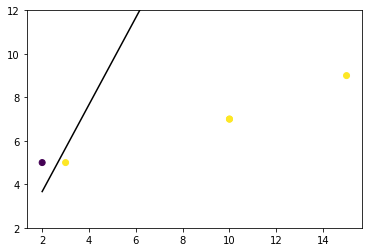

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

In [18]:
y_test

array([1., 0., 1., 1., 1., 0.])

In [19]:
predictions

array([1, 0, 0, 1, 1, 1])

In [20]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm=confusion_matrix(y_true=y_test, y_pred=predictions)

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  print(compile)

  thresh = cm.max()/2. 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual target')
    plt.xlabel('Predicted target')


In [21]:
ClassLabels = ['Van','Lorry']

<built-in function compile>


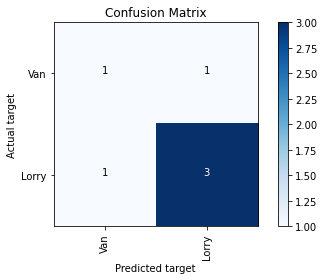

In [22]:
plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

In [24]:
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


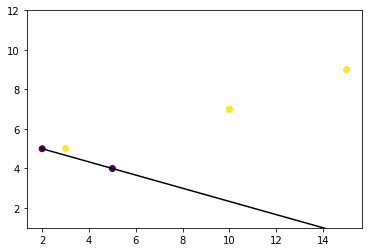

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

<built-in function compile>


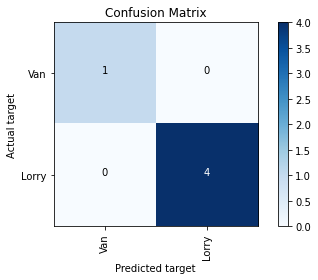

In [29]:
cm=confusion_matrix(y_true=y_test, y_pred=predictions)
plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

In [31]:
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


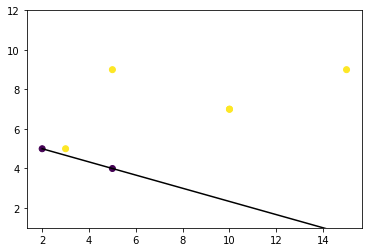

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

<built-in function compile>


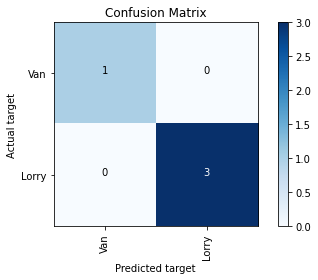

In [33]:
cm=confusion_matrix(y_true=y_test, y_pred=predictions)
plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

In [36]:
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


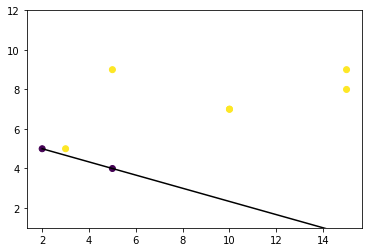

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

<built-in function compile>


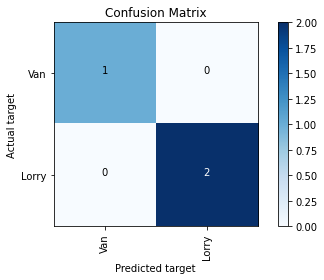

In [38]:
cm=confusion_matrix(y_true=y_test, y_pred=predictions)
plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

In [42]:
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


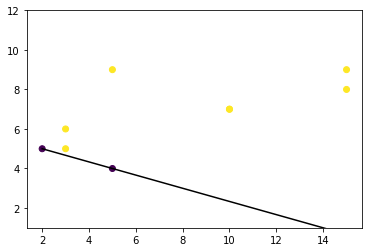

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

<built-in function compile>


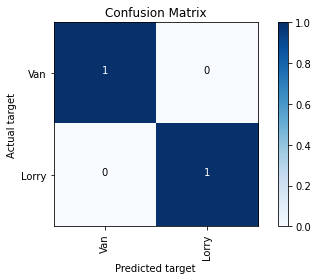

In [44]:
cm=confusion_matrix(y_true=y_test, y_pred=predictions)
plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')